Algorithm:

y=slope*x + intercept
We have to find the values of slope and intercept

slope=covarience(x)/varience(x)
intercept=y_mean-(slope*x_mean)

varience(x) = sum((x-x_mean)^2)
covarience = sum((x[i]-x_mean)*(y[i]-y_mean))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
x=df['X']
y=df['Y']

In [5]:
def find_mean(x):
    return sum(x)/len(x)

In [7]:
mean_x=find_mean(x)
mean_y=find_mean(y)
print('Mean X:',mean_x)
print('Mean Y:',mean_y)

Mean X: 22.904761904761905
Mean Y: 98.18730158730159


In [14]:
def find_varience(list1,mean_value):
    return sum([(x-mean_value)**2 for x in list1])

In [16]:
varience_x=find_varience(x,mean_x)
varience_x

33809.42857142858

In [17]:
def find_covarience(list_x,mean_x,list_y,mean_y):
    covar=0.0
    for i in range(len(list_x)):
        covar+= ((list_x[i]-mean_x)*(list_y[i]-mean_y))
        
    return covar

In [18]:
covar=find_covarience(x,mean_x,y,mean_y)
covar

115419.42380952384

In [19]:
def find_intercepts(covar,varience_x,mean_x,mean_y):
    slope=covar/varience_x
    intercept=mean_y-(slope*mean_x)
    
    return slope,intercept

In [24]:
slope,intercept=find_intercepts(covar,varience_x,mean_x,mean_y)
print('Slope: ',slope)
print('Intercept: ',intercept)

Slope:  3.4138235600663664
Intercept:  19.99448575911481


In [27]:
def train_test_splitting(x,y):
    temp=np.random.rand(len(df)) <0.8
    
    x_train=x[temp]
    x_test=x[~temp]
    y_train=y[temp]
    y_test=y[~temp]
    
    return x_train,x_test,y_train,y_test

In [29]:
x_train,x_test,y_train,y_test=train_test_splitting(x,y)

In [32]:
def make_predictions(list1,slope,intercept):
    predictions=[]
    for i in range(len(list1)):
        predictions.append((slope*list1[i])+intercept)
        
    return predictions

In [34]:
y_pred=make_predictions(x_test.to_list(),slope,intercept)

In [39]:
def find_rmse(predicted,actual):
    sum=0.0
    for i in range(len(actual)):
        error_sum=(predicted[i]-actual[i])
        sum+= error_sum**2
    
    mse=sum/len(actual)
    
    return sqrt(mse)

In [42]:
rmse=find_rmse(y_pred,y_test.to_list())
rmse

30.440438788793884

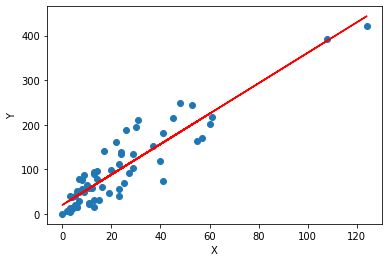

In [41]:
plt.figure()
plt.scatter(x,y)
plt.plot(x,(slope*x)+intercept,'-r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()